In [457]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from pathlib import Path
from functools import reduce

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [458]:
df = pd.read_csv('./corona_data_sets_modified/df_final.csv') 
df

,kreis,ags5,ags2,supermarkets_population,supermarkets_average_distance,public_transport_availability,average_distance_bus_stop,average_distance_train_station,average_distance_public_transport,Unnamed:_0,...,median_income,purchasing_power_per_household,purchasing_power_per_person,debtor_quota,household_in_income_calss_1,household_in_income_calss_2,household_in_income_calss_3,household_in_income_calss_4,household_in_income_calss_5,household_in_income_calss_6
0,"Flensburg, Stadt",1001,1,92,500,35,240,2901,240,0,...,2986,34496,19556,16.0,13209,12385,13092,5441,3096,3497
1,"Kiel, Landeshauptstadt",1002,1,92,460,37,268,2037,265,1,...,3304,35246,19612,12.1,22126,38523,39483,18567,11162,7841
2,"Lübeck, Hansestadt",1003,1,90,532,37,297,1927,294,2,...,3036,37219,20820,15.1,22881,30159,32571,15805,10999,9039
3,"Neumünster, Stadt",1004,1,85,588,37,316,1648,313,3,...,2842,38141,19561,17.9,7208,13291,10435,3812,3201,2805
4,Dithmarschen,1051,1,51,1864,35,448,3517,443,4,...,2914,46945,23486,12.8,11806,11575,17816,9873,7834,7676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,Saalfeld-Rudolstadt,16073,16,62,1423,37,341,2492,322,396,...,2466,39242,20959,8.3,12237,13267,19810,5653,3271,2547
397,Saale-Holzland-Kreis,16074,16,54,1677,38,343,3419,340,397,...,2288,42956,20631,7.6,5131,9216,14445,5254,3446,2379
398,Saale-Orla-Kreis,16075,16,54,1686,35,449,3172,444,398,...,2253,40511,20610,7.6,7388,7994,17082,4532,2501,1632
399,Greiz,16076,16,55,1654,38,608,2779,563,399,...,2233,40784,21275,7.8,11098,10354,18760,5324,3370,2287


In [459]:
df = pd.read_csv('./corona_data_sets_modified/df_final.csv') 
df[df["kreis"]=="München"]

,kreis,ags5,ags2,supermarkets_population,supermarkets_average_distance,public_transport_availability,average_distance_bus_stop,average_distance_train_station,average_distance_public_transport,Unnamed:_0,...,median_income,purchasing_power_per_household,purchasing_power_per_person,debtor_quota,household_in_income_calss_1,household_in_income_calss_2,household_in_income_calss_3,household_in_income_calss_4,household_in_income_calss_5,household_in_income_calss_6


In [460]:
df 

,kreis,ags5,ags2,supermarkets_population,supermarkets_average_distance,public_transport_availability,average_distance_bus_stop,average_distance_train_station,average_distance_public_transport,Unnamed:_0,...,median_income,purchasing_power_per_household,purchasing_power_per_person,debtor_quota,household_in_income_calss_1,household_in_income_calss_2,household_in_income_calss_3,household_in_income_calss_4,household_in_income_calss_5,household_in_income_calss_6
0,"Flensburg, Stadt",1001,1,92,500,35,240,2901,240,0,...,2986,34496,19556,16.0,13209,12385,13092,5441,3096,3497
1,"Kiel, Landeshauptstadt",1002,1,92,460,37,268,2037,265,1,...,3304,35246,19612,12.1,22126,38523,39483,18567,11162,7841
2,"Lübeck, Hansestadt",1003,1,90,532,37,297,1927,294,2,...,3036,37219,20820,15.1,22881,30159,32571,15805,10999,9039
3,"Neumünster, Stadt",1004,1,85,588,37,316,1648,313,3,...,2842,38141,19561,17.9,7208,13291,10435,3812,3201,2805
4,Dithmarschen,1051,1,51,1864,35,448,3517,443,4,...,2914,46945,23486,12.8,11806,11575,17816,9873,7834,7676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,Saalfeld-Rudolstadt,16073,16,62,1423,37,341,2492,322,396,...,2466,39242,20959,8.3,12237,13267,19810,5653,3271,2547
397,Saale-Holzland-Kreis,16074,16,54,1677,38,343,3419,340,397,...,2288,42956,20631,7.6,5131,9216,14445,5254,3446,2379
398,Saale-Orla-Kreis,16075,16,54,1686,35,449,3172,444,398,...,2253,40511,20610,7.6,7388,7994,17082,4532,2501,1632
399,Greiz,16076,16,55,1654,38,608,2779,563,399,...,2233,40784,21275,7.8,11098,10354,18760,5324,3370,2287


In [461]:
print(', '.join(df.columns.to_numpy()))

kreis, ags5, ags2, supermarkets_population, supermarkets_average_distance, public_transport_availability, average_distance_bus_stop, average_distance_train_station, average_distance_public_transport, Unnamed:_0, number_of_students, number_of_hospitals, number_of_hospital_beds, number_of_hospital_beds_adj, hospital_patiants, households_of_1_person, households_of_2_person, households_of_3_person, households_of_4_person, households_of_5_person_or_more, household_with_kids, household_with_kids_under_3, household_with_kids_over_3_under_6, household_with_kids_over_6_under_10, household_with_kids_over_10_under_15, household_with_kids_over_15_under_18, household_with_double_income_no_kids, car_density, no_of_paths_per_person_and_day, kilometers_per_person_and_day, _percentage_out_of_home, share_of_journeys_on_foot, share_of_journeys_on_bike, proportion_of_motorised_vehicle_passenger, share_of_motorised_vehicle_driver, share_of_public_transport_, public_transport_per_1000_inhabitants, activity_

### Scaling the data

In [462]:
X = df.drop(["ags2","ags5","kreis"], 1)
scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)
X = pd.DataFrame(scaled_data, columns = X.columns)

## PCA

In [463]:
pca = PCA(n_components=3)

In [464]:
pca.fit(X)

PCA(n_components=3)

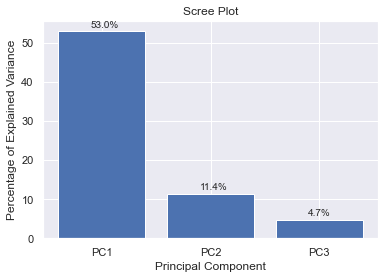

In [465]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
for index,data in enumerate(per_var):
    plt.text(x=index+0.9 , y =data+1 , s=f"{data}%" , fontdict=dict(fontsize=10))
plt.show()



In [466]:
principalComponents = pca.fit_transform(scaled_data)
PCA_components = pd.DataFrame(principalComponents)
PCA_components

,0,1,2
0,-2.809960,-9.150993,2.624741
1,3.151826,-9.668073,1.929939
2,1.487487,-7.136051,3.111064
3,-3.966011,-7.009615,2.169364
4,-3.086488,2.730706,2.117233
...,...,...,...
396,-4.132541,0.740443,3.128386
397,-5.155978,1.002697,1.634102
398,-5.470702,2.128744,2.463583
399,-4.855904,1.928560,3.252628


### Importance of each feature

In [467]:
pca_param = pd.DataFrame(pca.components_,columns=X.columns,index = ['PC-1','PC-2','PC-3'])
pca_param = pca_param.T


In [468]:
pca_param['total'] =pca_param['PC-1'] + pca_param['PC-2'] + pca_param['PC-3']
pca_param.sort_values(['total'], ascending=[False]).head(20)

,PC-1,PC-2,PC-3,total
total_area,-0.002836,0.139643,0.129195,0.266002
household_in_income_calss_1,0.080308,-0.003665,0.166913,0.243557
number_of_companies_administration,0.067827,0.097952,0.052579,0.218359
supermarkets_average_distance,-0.038041,0.165294,0.084848,0.212100
household_in_income_calss_2,0.095141,-0.015126,0.107065,0.187079
number_of_companies_construction,0.091201,0.060032,0.030260,0.181493
number_of_companies_water_and_sewage,0.089913,0.055327,0.034487,0.179727
number_of_beds,0.072620,0.045811,0.057412,0.175844
average_distance_public_transport,-0.023772,0.131284,0.062146,0.169657
number_of_companies_domestic_staff,0.073806,0.026618,0.067530,0.167953


Text(0, 0.5, 'PCA 2')

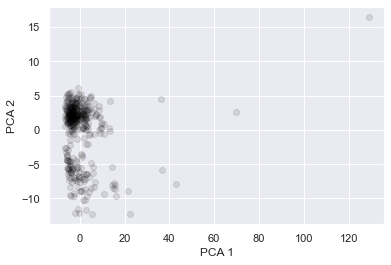

In [469]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

## Clustering 

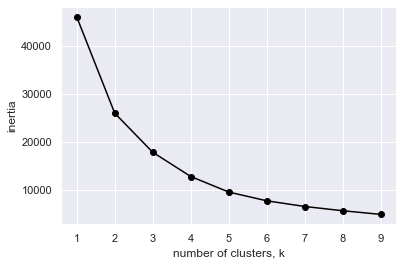

In [470]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [471]:
km = KMeans(n_clusters=3).fit(X)

cluster_map = pd.DataFrame()
cluster_map['data_index'] = df.index.values
cluster_map['cluster'] = km.labels_
df = cluster_map.merge(df, left_on='data_index', right_index=True)

### Looking at the clusters

In [472]:
print(', '.join(df.loc[df['cluster'] == 0]['kreis'].to_numpy()))

Kiel, Landeshauptstadt, Lübeck, Hansestadt, Braunschweig, Hannover, Bremen, Bremerhaven, Düsseldorf, Duisburg, Essen, Krefeld, Mönchengladbach, Oberhausen, Wuppertal, Mettmann, Rhein-Kreis Neuss, Wesel, Bonn, Köln, Aachen, Rhein-Erft-Kreis, Rhein-Sieg-Kreis, Gelsenkirchen, Münster, Borken, Recklinghausen, Steinfurt, Bielefeld, Gütersloh, Bochum, Dortmund, Herne, Ennepe-Ruhr-Kreis, Märkischer Kreis, Unna, Kreisfreie Stadt Darmstadt, Kreisfreie Stadt Frankfurt am Main, Kreisfreie Stadt Offenbach am Main, Landeshauptstadt Wiesbaden, Groß-Gerau, Main-Kinzig, Offenbach, Kreisfreie Stadt Kassel, Stadt Ludwigshafen a. Rh., Stadt Mainz, Stuttgart, Böblingen, Esslingen, Ludwigsburg, Rems-Murr-Kreis, Karlsruhe, Stadt, Karlsruhe, Kreis, Heidelberg, Mannheim, Rhein-Neckar-Kreis, Freiburg im Breisgau, Ortenaukreis, München, Landeshauptstadt, Rosenheim, Stadt, München, Kreis, Regensburg, Stadt, Nürnberg, Augsburg, Stadt, Regionalverband Saarbrücken, Dresden, Leipzig, Stadt, Halle (Saale), Magdeburg,

In [473]:
df[['cluster', 'ags5']].groupby(['cluster']).agg(['count'])


,ags5
,count
cluster,
0,68
1,2
2,331


In [474]:
df.loc[df['cluster'] == 1]['kreis'].to_numpy()

array(['Hamburg', 'Berlin'], dtype=object)

In [475]:
print(', '.join(df.loc[df['cluster'] == 2]['kreis'].to_numpy()))

Flensburg, Stadt, Neumünster, Stadt, Dithmarschen, Herzogtum Lauenburg, Nordfriesland, Ostholstein, Pinneberg, Plön, Rendsburg-Eckernförde, Schleswig-Flensburg, Segeberg, Steinburg, Stormarn, Salzgitter, Wolfsburg, Gifhorn, Goslar, Helmstedt, Northeim, Peine, Wolfenbüttel, Göttingen, Diepholz, Hameln-Pyrmont, Hildesheim, Holzminden, Nienburg/Weser, Schaumburg, Celle, Cuxhaven, Harburg, Lüchow-Dannenberg, Lüneburg, Osterholz, Rotenburg (Wümme), Heidekreis, Stade, Uelzen, Verden, Delmenhorst, Emden, Oldenburg, Stadt, Osnabrück, Stadt, Wilhelmshaven, Ammerland, Aurich, Cloppenburg, Emsland, Friesland, Grafschaft Bentheim, Leer, Oldenburg, Kreis, Osnabrück, Kreis, Vechta, Wesermarsch, Wittmund, Mülheim an der Ruhr, Remscheid, Solingen, Kleve, Viersen, Leverkusen, Düren, Euskirchen, Heinsberg, Oberbergischer Kreis, Rheinisch-Bergischer Kreis, Bottrop, Coesfeld, Warendorf, Herford, Höxter, Lippe, Minden-Lübbecke, Paderborn, Hagen, Hamm, Hochsauerlandkreis, Olpe, Siegen-Wittgenstein, Soest, B

In [476]:
df.to_csv('./corona_data_sets_modified/df_final_with_clusters.csv')